# PEAD - Post Pandemic Era (Test Hypothesis)

Abstract: Based on how the market receives a company’s earnings report, there could be large price swings. It is widespread for a stock price to witness a sharp rise or decline immediately after an earnings report. The tendency for a stock to shift by massive magnitude in a specific direction after an earnings report creates active trading opportunities is known as Post Earnings Announcement Drift. If the surprise element in the earnings announcement is positive, the stock prices move positively and vice versa. This means that the direction of the price drift can be predicted based on the magnitude of an earnings surprise. 

### Background Litterature​
The market often see strange behavior of stock prices. It has witnessed stock prices falling several times despite a positive earnings surprise. Most investors are more interested in the forward guidance than the earnings. Even the company management cares more about the stream of future earnings. 

In 1968, Ball and Brown produced a ground-breaking study that illustrated that there is valuable information content in financial statements. Their research changed the field of accounting and the nature of capital markets.  It changed the field of accounting because before the work of Ball and Brown, investors felt that accounting statements had minimal value (Ball and Brown, 1968). Financial statements were thought to constructed based on normative, subjective preferences of the preparers of financial statements (Kothari, 2001). Additionally, he asserted that investors had access to other, more timely sources of information, and the access to those sources of information made financial statement announcements largely irrelevant to company valuation. But the work of Ball and Brown (1968) changed this sentiment. 
Ball and Brown showed that company earnings announcements had a significant effect on company price; additionally, Ball and Brown showed that when the effect was diminished, it was generally due to the fact that the information contained in the financial statements had already been released by other sources, and it was not due to the fact that the information was not valuable. 

Combined with other concurrent developments((Positive Accounting Theory developed in the late 1970s by Watts and Zimmerman, the Efficient Market Hypothesis pioneered by Fama in 1965, the Capital Asset Pricing Model developed by Sharpe (1964) and Lintner (1965), and an event study by Fama, Fisher), Ball and Brown (1968) gave researchers the tools to assess the true impact of company earnings and market events.  
Research by George Benston in 1967 suggested that the assertion that accounting metrics could be meaningless (Benston,1967). He found no relationship between company earnings and stock price, and he suggested that this could be due to the lack of consensus in accounting objectives. Ball and Brown tested the assertion and they found that these assertions were untrue. They tested this by an event study and an association study (Kothari, 2001) . 

The association study seeks to find a positive relationship between stock returns and accounting performance measures; and an association study is not dependent on the timing of a particular event (Kothari, 2001). Ball and Brown found it necessary to conduct an association study. Because investors have access to multiple sources of information about companies, the actual event of the company announcement may not be
strongly correlated with market returns; however, the information contained within those announcements could be very strongly correlated with market returns. 
The association study showed that the content in the earnings announcements was relevant; however, investors were able to discover that information before the actual announcement.

The event study conducted by Ball and Brown was important in showing the relationship between announced company earnings surprises and price jumps, and the association study was important in determining the timeliness of the company announcements. Interestingly they found that most (90%) of the the portion of a stock's return that cannot be explained by market movements occurred in the year before the earnings announcements. 
Recent studies standardized the earning surprise, and hypothesized that the standardized unexpected earnings could be a better better proxy for market reactions, and test the hypothesis relevance to the abnormal return.


We then investigate and attempted to find a better proxy for market reactions in the post pandemic era through a series of emperical analysis.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = '/Users/teddytenetcha/Desktop/FIN465_Dataset.csv'
data = pd.read_csv(file_path)
data.head()

,stock_num,ticker,earnings_year,earnings_quarter,earnings_date,earnings_timing,effective_earnings_date,eps_estimate,reported_eps,surprise_pct,...,mkt_rtn_d26,mkt_rtn_d27,mkt_rtn_d28,mkt_rtn_d29,mkt_rtn_d30,7_d_cum_return,30_d_cum_rtn,7d_car,30d_car,Unnamed: 141
0,323.0,SMBK,2022.0,1.0,1/24/22,1.0,1/25/22,0.48,0.40,-0.1710,...,-0.014512,0.000000,0.000000,0.000000,-0.018221,-0.001387,-0.027555,0.0028,-0.0005,NaN
1,218.0,SAR,2021.0,1.0,1/6/21,1.0,1/7/21,0.47,0.57,0.2128,...,0.000000,0.011890,0.003839,0.019781,0.014035,0.026288,0.064777,-0.0426,-0.0144,NaN
2,196.0,MTW,2021.0,1.0,2/9/21,1.0,2/10/21,0.09,0.19,1.1348,...,0.000000,0.000000,0.019101,0.018093,0.023127,-0.011368,0.027776,0.0236,0.3285,NaN
3,362.0,NEXA,2021.0,1.0,2/11/21,1.0,2/12/21,0.49,0.38,-0.2306,...,0.019101,0.018093,0.023127,0.006094,0.003137,-0.029528,0.033976,-0.0322,0.0353,NaN
4,396.0,KREF,2021.0,1.0,2/16/21,1.0,2/17/21,0.49,0.48,-0.0141,...,0.000000,0.000000,-0.017223,0.007273,-0.029447,-0.017998,0.009156,0.0457,0.0102,NaN


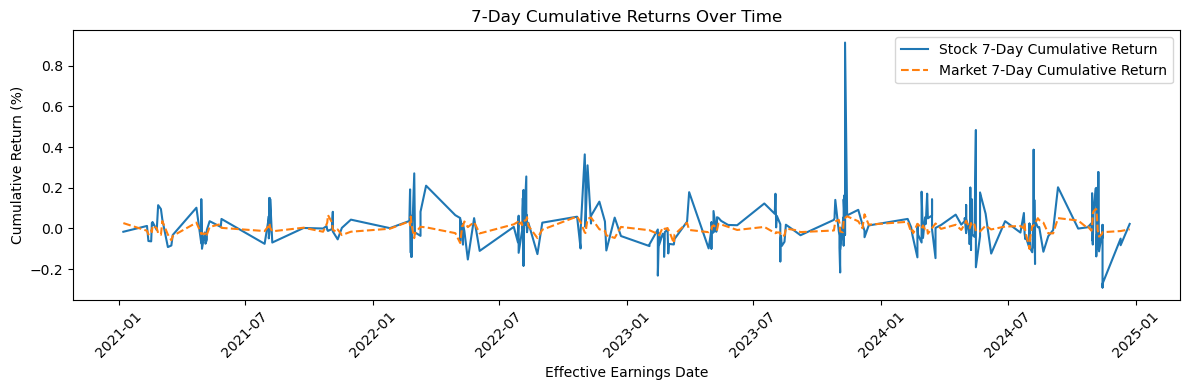

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/teddytenetcha/Desktop/FIN465_Dataset.csv'
data = pd.read_csv(file_path)

# Step 2: Clean column names
df.rename(columns={
    '7_day_cum _rtn': '7_day_cum_rtn',
    '7_d_cum_return': '7_day_cum_market_rtn'
}, inplace=True)

# Step 3: Convert date column to datetime
df['effective_earnings_date'] = pd.to_datetime(df['effective_earnings_date'], errors='coerce')

# Step 4: Drop rows with missing values for the required fields
stock_df = df[['effective_earnings_date', '7_day_cum_rtn']].dropna()
market_df = df[['effective_earnings_date', '7_day_cum_market_rtn']].dropna()

# Step 5: Sort by date
stock_df = stock_df.sort_values(by='effective_earnings_date')
market_df = market_df.sort_values(by='effective_earnings_date')

# Step 6: Plotting without gridlines and markers
plt.figure(figsize=(12, 4))

plt.plot(stock_df['effective_earnings_date'], stock_df['7_day_cum_rtn'], 
         linestyle='-', label='Stock 7-Day Cumulative Return')

plt.plot(market_df['effective_earnings_date'], market_df['7_day_cum_market_rtn'], 
         linestyle='--', label='Market 7-Day Cumulative Return')

plt.title("7-Day Cumulative Returns Over Time")
plt.xlabel("Effective Earnings Date")
plt.ylabel("Cumulative Return (%)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Interpretation: 
The stock market reacts to earnings, but the reaction is noisy and quickly absorbed.
There's no persistent 7-day upward drift, meaning no broad PEAD effect in this time frame.

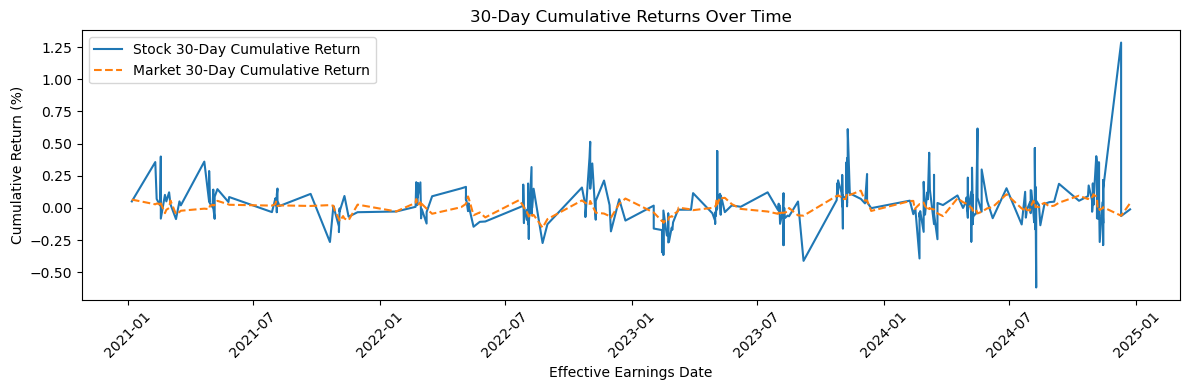

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/teddytenetcha/Desktop/FIN465_Dataset.csv'
data = pd.read_csv(file_path)

df.rename(columns={
    '30_day_cum _rtn': '30_day_cum_rtn',
    '30_d_cum_rtn': '30_day_cum_market_rtn'
}, inplace=True)

# Convert date column to datetime
df['effective_earnings_date'] = pd.to_datetime(df['effective_earnings_date'], errors='coerce')

stock_df = df[['effective_earnings_date', '30_day_cum_rtn']].dropna()
market_df = df[['effective_earnings_date', '30_day_cum_market_rtn']].dropna()

# Sort by date
stock_df = stock_df.sort_values(by='effective_earnings_date')
market_df = market_df.sort_values(by='effective_earnings_date')

plt.figure(figsize=(12, 4))

plt.plot(stock_df['effective_earnings_date'], stock_df['30_day_cum_rtn'], 
         linestyle='-', label='Stock 30-Day Cumulative Return')

plt.plot(market_df['effective_earnings_date'], market_df['30_day_cum_market_rtn'], 
         linestyle='--', label='Market 30-Day Cumulative Return')

plt.title("30-Day Cumulative Returns Over Time")
plt.xlabel("Effective Earnings Date")
plt.ylabel("Cumulative Return (%)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Interpretation:
While individual stocks occasionally show strong post-earnings momentum, the overall 30-day drift is weak, noisy, and inconsistent.
While stocks sometimes react strongly to earnings, the return pattern is noisier and less stable than the market, and shows no consistent evidence of delayed market reaction (PEAD) over 30 days.

In [77]:
import pandas as pd
import numpy as np

file_path = '/Users/teddytenetcha/Desktop/FIN465_Dataset.csv'
data = pd.read_csv(file_path)

df.rename(columns={
    '7d_car': 'car_7d',
    '30d_car': 'car_30d'
}, inplace=True)

# Drop NA values from relevant columns
car_7d = df['car_7d'].dropna()
car_30d = df['car_30d'].dropna()

def calculate_metrics(car_series, holding_period):
    avg_perf = car_series.mean()
    volatility = car_series.std()
    sharpe_ratio = avg_perf / volatility if volatility != 0 else np.nan
    max_drawdown = car_series.min()
    car_dd_ratio = avg_perf / abs(max_drawdown) if max_drawdown != 0 else np.nan
    
    return {
        "Holding Period": holding_period,
        "Average Performance": avg_perf,
        "Volatility": volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown,
        "CAR/Max DD Ratio": car_dd_ratio
    }

# Compile metrics
summary_data = [
    calculate_metrics(car_7d, "7 Days"),
    calculate_metrics(car_30d, "30 Days")
]

# Create summary table
summary_df = pd.DataFrame(summary_data)

# Display or return the table
print(summary_df)


  Holding Period  Average Performance  Volatility  Sharpe Ratio  Max Drawdown  \
0         7 Days             0.006626    0.107129      0.061854       -0.2715   
1        30 Days             0.022951    0.160444      0.143048       -0.6285   

   CAR/Max DD Ratio  
0          0.024407  
1          0.036517  


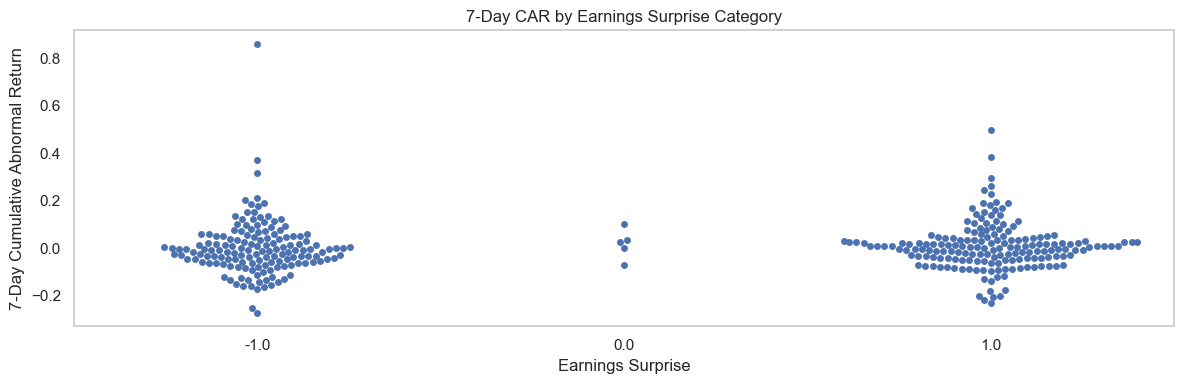

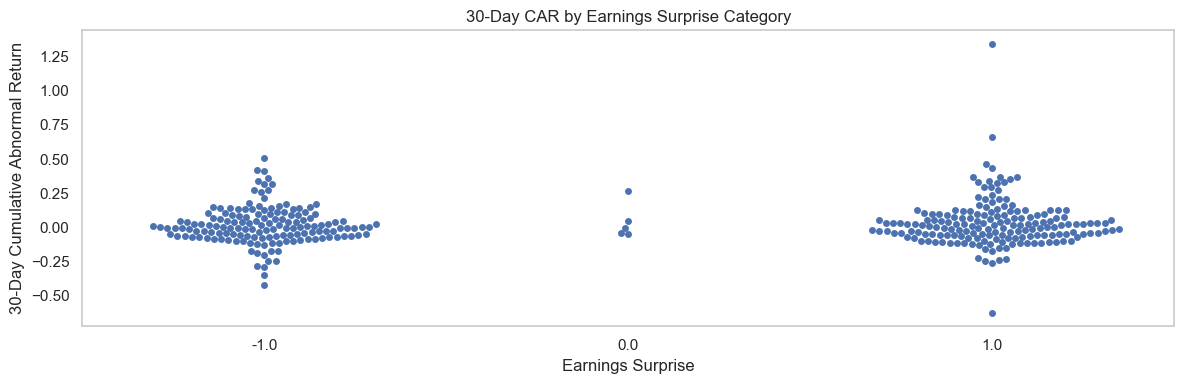

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/teddytenetcha/Desktop/FIN465_Dataset.csv'
df = pd.read_csv(file_path)

# Rename CAR and surprise category columns if needed
df.rename(columns={
    '7d_car': 'car_7d',
    '30d_car': 'car_30d',
    'surprise_category': 'surprise_cat'
}, inplace=True)

# Drop missing values for required fields
swarm_df = df[['surprise_cat', 'car_7d', 'car_30d']].dropna()

# Plot 1: 7-Day CAR vs Surprise Category
plt.figure(figsize=(12, 4))
sns.swarmplot(x='surprise_cat', y='car_7d', data=swarm_df)
plt.title("7-Day CAR by Earnings Surprise Category")
plt.xlabel("Earnings Surprise")
plt.ylabel("7-Day Cumulative Abnormal Return")
plt.grid(False)  # REMOVE GRIDLINES
plt.tight_layout()
plt.show()

# Plot 2: 30-Day CAR vs Surprise Category
plt.figure(figsize=(12, 4))
sns.swarmplot(x='surprise_cat', y='car_30d', data=swarm_df)
plt.title("30-Day CAR by Earnings Surprise Category")
plt.xlabel("Earnings Surprise")
plt.ylabel("30-Day Cumulative Abnormal Return")
plt.grid(False)  # REMOVE GRIDLINES
plt.tight_layout()
plt.show()


The market reacts positively and sharply to positive earnings surprises in the short term(7 days windows), but less strongly and more variably to negative surprises.
The impact of earnings surprises persists over 30 days, especially for positive surprises but volatility increases.

#### Interpretation:
Positive earnings surprises tend to lead to strong positive abnormal returns, both in the short and medium term.
Negative surprises lead to less consistent negative reactions possibly due to market expectations already priced in or varying severity.

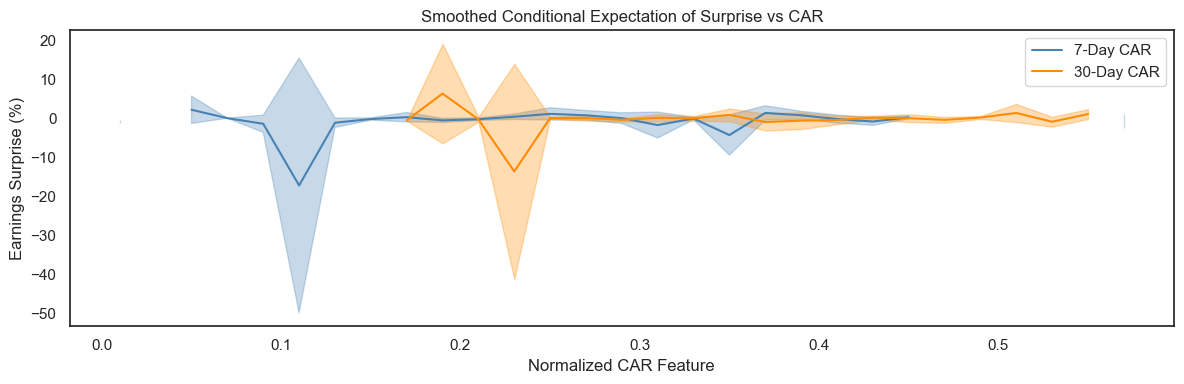

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import sem


df = pd.read_csv('/Users/teddytenetcha/Desktop/FIN465_Dataset.csv')

df.rename(columns={
    '7d_car': 'car_7d',
    '30d_car': 'car_30d',
    'surprise_pct': 'surprise_pct'
}, inplace=True)

df = df[['car_7d', 'car_30d', 'surprise_pct']].dropna()

# Normalize CAR values to [0, 1]
scaler = MinMaxScaler()
df[['car_7d_norm', 'car_30d_norm']] = scaler.fit_transform(df[['car_7d', 'car_30d']])

# compute smoothed conditional expectation + 95% CI
def conditional_expectation(df, x_col, y_col, bins=50):
    x = df[x_col]
    y = df[y_col]
    bin_edges = np.linspace(0, 1, bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    means = []
    conf_intervals = []

    for i in range(bins):
        mask = (x >= bin_edges[i]) & (x < bin_edges[i + 1])
        y_bin = y[mask]
        if len(y_bin) > 1:
            mean_y = y_bin.mean()
            conf = 1.96 * sem(y_bin)
        else:
            mean_y = np.nan
            conf = np.nan
        means.append(mean_y)
        conf_intervals.append(conf)

    return bin_centers, np.array(means), np.array(conf_intervals)

# Get smoothed values
x1, y1, ci1 = conditional_expectation(df, 'car_7d_norm', 'surprise_pct')
x2, y2, ci2 = conditional_expectation(df, 'car_30d_norm', 'surprise_pct')

# Plot
plt.figure(figsize=(12, 4))
plt.plot(x1, y1, color='steelblue', label='7-Day CAR')
plt.fill_between(x1, y1 - ci1, y1 + ci1, color='steelblue', alpha=0.3)

plt.plot(x2, y2, color='darkorange', label='30-Day CAR')
plt.fill_between(x2, y2 - ci2, y2 + ci2, color='darkorange', alpha=0.3)

plt.xlabel("Normalized CAR Feature")
plt.ylabel("Earnings Surprise (%)")
plt.title("Smoothed Conditional Expectation of Surprise vs CAR")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


#### Methodology

To explore the relationship between cumulative abnormal returns (CAR) and earnings surprise, we estimate the smoothed conditional expectation function 𝑓(𝑥)=𝐸[Surprise∣CAR=𝑥], a foundational concept in non parametric regression. This function captures the average earnings surprise conditional on different levels of abnormal stock returns, enabling us to understand how the market’s reaction (via CAR) reflects underlying earnings information. We analyze this for both 7 day and 30 day CARs, which are first normalized to the [0,1] range to ensure comparability. The normalized CAR values are binned uniformly, and for each bin, we compute the mean surprise percentage and the 95% confidence interval using standard error estimation. These smoothed averages are then plotted against the CAR range, with shaded bands representing confidence intervals. This approach helps reveal how abnormal returns of different magnitudes relate to the informativeness of earnings announcements, while also accounting for uncertainty and data sparsity in different regions of the CAR distribution.

At 7 day:
At very low CAR values, the average surprise is quite negative, sometimes below -40%, but with wide uncertainty.As CAR increases (even modestly), the surprise % rises toward zero, stabilizing quickly. Beyond that, it fluctuates but stays low indicating that short term CAR is mostly driven by small surprises, except at the extremes.

At 30 day: Shows less negative dips early on but rises more strongly after 0.4 on the x-axis. At high CAR levels (>0.8), we observe significant positive surprises with higher variance indicating:Firms with strong 30day CARs tend to have experienced large positive earnings surprises.

#### Overall
There's a positive relationship between CAR and surprise: stronger CARs tend to coincide with larger surprises, especially over 30 days.7 day CAR shows a more immediate market reaction, but the link to surprise is weaker and more volatile.

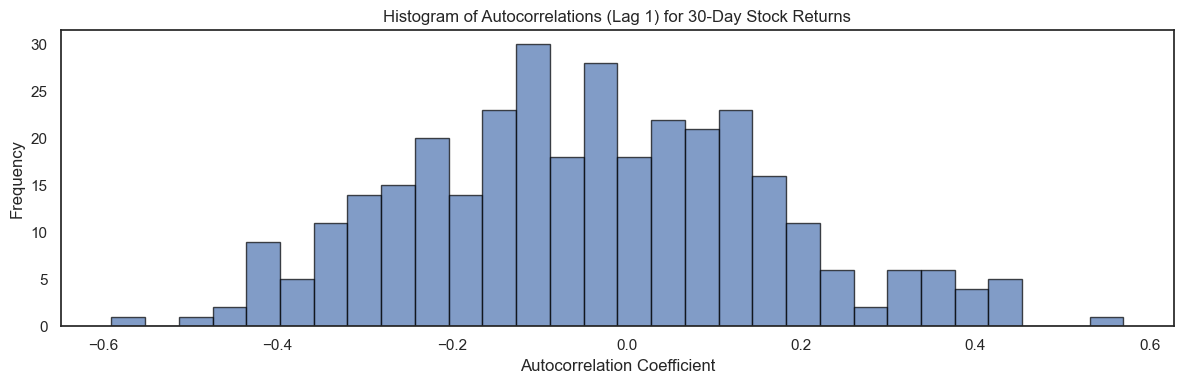

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/teddytenetcha/Desktop/FIN465_Dataset.csv')

# Extract daily return columns (stock_rtn_d1 to stock_rtn_d30)
return_cols = [f'stock_rtn_d{i}' for i in range(1, 31)]
returns_matrix = df[return_cols].dropna()

# Compute autocorrelation for each row (firm or event)
def calc_autocorr(row, lag=1):
    return row.autocorr(lag=lag)

autocorrs = returns_matrix.apply(calc_autocorr, axis=1)

# Plot histogram
plt.figure(figsize=(12, 4))
plt.hist(autocorrs.dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Autocorrelations (Lag 1) for 30-Day Stock Returns")
plt.xlabel("Autocorrelation Coefficient")
plt.ylabel("Frequency")
plt.grid(False)  # no gridlines
plt.tight_layout()
plt.show()


#### Methodology:
Autocorrelation reflects how strongly a variable is correlated with its own past values over time. it's useful because it helps to understand whether past values can inform future ones. Evaluate data quality and imputation strategies.


The distribution is centered slightly below zero, suggesting that short term momentum in 30 day stock returns is not prevalent and that mean reversion is more common. The majority of autocorrelation values fall between -0.4 and +0.2, indicating modest negative or near zero autocorrelation, while relatively few stocks exhibit strong positive persistence ( >0.3). Statistically, this implies that most stocks’ 30 day returns do not follow strong trends, and past returns provide limited information about future returns, reinforcing the idea that the market efficiently absorbs information after earnings, rather than drifting predictably over time.

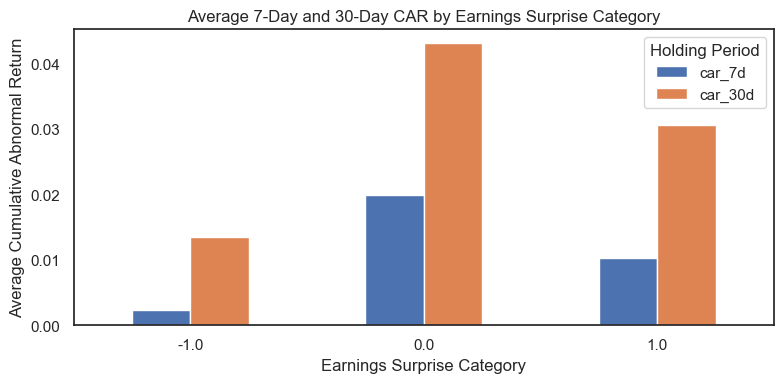

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/Users/teddytenetcha/Desktop/FIN465_Dataset.csv')

# Rename relevant columns
df.rename(columns={
    '7d_car': 'car_7d',
    '30d_car': 'car_30d',
    'surprise_category': 'surprise_cat'
}, inplace=True)

# Drop rows with missing category or returns
df_filtered = df[['surprise_cat', 'car_7d', 'car_30d']].dropna()

# Group by surprise category and compute portfolio (group) averages
portfolio_avg = df_filtered.groupby('surprise_cat')[['car_7d', 'car_30d']].mean()

# Plotting
portfolio_avg.plot(kind='bar', figsize=(8, 4))
plt.title("Average 7-Day and 30-Day CAR by Earnings Surprise Category")
plt.ylabel("Average Cumulative Abnormal Return")
plt.xlabel("Earnings Surprise Category")
plt.xticks(rotation=0)
plt.legend(title="Holding Period")
plt.grid(False)
plt.tight_layout()
plt.show()


/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_79740/1061509151.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df_sorted.groupby('bin')['surprise_pct'].mean().reset_index(drop=True).rename(label)
/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_79740/1061509151.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df_sorted.groupby('bin')['surprise_pct'].mean().reset_index(drop=True).rename(label)


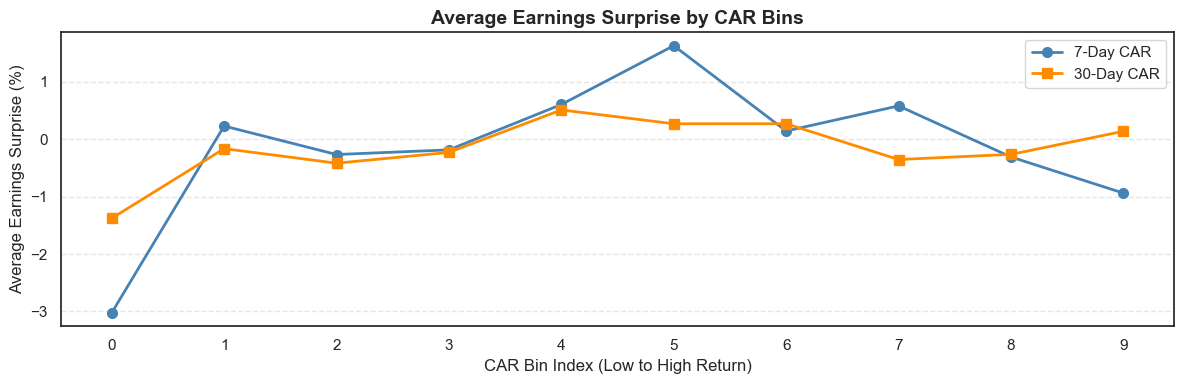

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
df = pd.read_csv('/Users/teddytenetcha/Desktop/FIN465_Dataset.csv')
df.rename(columns={'7d_car': 'car_7d', '30d_car': 'car_30d', 'surprise_pct': 'surprise_pct'}, inplace=True)
df = df[['car_7d', 'car_30d', 'surprise_pct']].dropna()

# Binning function for average surprise by CAR
def avg_surprise_by_car_bins(car_column, label, bins=10):
    df_sorted = df[[car_column, 'surprise_pct']].dropna()
    df_sorted['bin'] = pd.qcut(df_sorted[car_column], bins, duplicates='drop')
    return df_sorted.groupby('bin')['surprise_pct'].mean().reset_index(drop=True).rename(label)

# Apply binning
avg_7d = avg_surprise_by_car_bins('car_7d', 'Surprise_7d')
avg_30d = avg_surprise_by_car_bins('car_30d', 'Surprise_30d')

# Combine into a DataFrame
timescale_df = pd.concat([avg_7d, avg_30d], axis=1)

# Plot with upgraded aesthetics
plt.figure(figsize=(12, 4))
x = np.arange(len(timescale_df))

plt.plot(x, timescale_df['Surprise_7d'], marker='o', markersize=7, linewidth=2, label='7-Day CAR', color='steelblue')
plt.plot(x, timescale_df['Surprise_30d'], marker='s', markersize=7, linewidth=2, label='30-Day CAR', color='darkorange')

plt.title("Average Earnings Surprise by CAR Bins", fontsize=14, weight='bold')
plt.xlabel("CAR Bin Index (Low to High Return)", fontsize=12)
plt.ylabel("Average Earnings Surprise (%)", fontsize=12)

plt.xticks(x)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Side Note: 
Bins are ranges of values used to group continuous data into discrete intervals. Think of them like buckets: instead of looking at every individual return, we divide a range into segments and analyze values within each segment together. 7 day CAR is continuous, so to analyze how earnings surprise % varies with CAR, we sort all stocks by their 7 day CAR then split them into 10 equally sized groups (called quantile bins) Bin 0 = 10% of stocks with lowest CAR, Bin 9 = 10% of stocks with highest CAR

#### Interpretation:
Earnings surprises are a strong driver of short-term abnormal returns. The market reacts quickly and disproportionately to negative surprises (sharp dip in early bins), and positively but more gradually to moderate positive surprises. Over a 30-day horizon, the effect of surprise is still visible but more dampened, possibly due to other market forces or post earnings drift effects.

In [125]:
import pandas as pd
import numpy as np

# Load and clean data
df = pd.read_csv('/Users/teddytenetcha/Desktop/FIN465_Dataset.csv')  # Adjust path
df.rename(columns={
    '7d_car': 'car_7d',
    'surprise_pct': 'surprise_pct',
    'earnings_year': 'year'
}, inplace=True)
df = df[['surprise_pct', 'car_7d', 'year']].dropna()

# Sorting schemes to evaluate
grouping_levels = {
    '1/2 (Median)': 2,
    '1/3 (Terciles)': 3,
    '1/4 (Quartiles)': 4,
    '1/5 (Quintiles)': 5,
    '1/10 (Deciles)': 10
}

summary_output = []

# Loop over each method
for method_name, n_bins in grouping_levels.items():
    # Assign surprise groups within each year
    def assign_bins(group):
        group = group.copy()
        group['surprise_group'] = pd.qcut(
            group['surprise_pct'],
            n_bins,
            labels=[f'{i+1}/{n_bins}' for i in range(n_bins)]
        )
        return group

    df_binned = df.groupby('year', group_keys=False).apply(assign_bins)

    # Group by surprise group and compute stats
    for group_label, data in df_binned.groupby('surprise_group'):
        car = data['car_7d']
        avg_perf = car.mean()
        vol = car.std()
        sharpe = avg_perf / vol if vol != 0 else np.nan
        max_dd = np.percentile(car, 5)  # more robust than min
        car_dd = avg_perf / abs(max_dd) if max_dd != 0 else np.nan

        summary_output.append({
            'Sorting Method': method_name,
            'Surprise Group': group_label,
            'Average Performance (7d CAR)': avg_perf,
            'Volatility': vol,
            'Sharpe Ratio': sharpe,
            '5th Percentile Drawdown': max_dd,
            'CAR / Max DD Ratio': car_dd
        })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_output)

# Select only the top surprise group from each sorting method
final_summary = summary_df.groupby('Sorting Method').apply(
    lambda x: x.sort_values(by='Surprise Group').iloc[-1]
).reset_index(drop=True)

# Display
print(final_summary)


    Sorting Method Surprise Group  Average Performance (7d CAR)  Volatility  \
0   1/10 (Deciles)           9/10                      0.006173    0.096518   
1     1/2 (Median)            2/2                      0.011073    0.100660   
2   1/3 (Terciles)            3/3                      0.021200    0.099197   
3  1/4 (Quartiles)            4/4                      0.017968    0.094352   
4  1/5 (Quintiles)            5/5                      0.012940    0.088881   

   Sharpe Ratio  5th Percentile Drawdown  CAR / Max DD Ratio  
0      0.063954                -0.133140            0.046363  
1      0.110003                -0.127275            0.087000  
2      0.213717                -0.087000            0.243678  
3      0.190434                -0.084725            0.212073  
4      0.145591                -0.085380            0.151561  


/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_79740/2664310132.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_binned = df.groupby('year', group_keys=False).apply(assign_bins)
/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_79740/2664310132.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_label, data in df_binned.groupby('surprise_group'):
/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_79740/2664310132.py:36: DeprecationWarning: DataFrameGroupBy.apply

In [129]:
import pandas as pd
import statsmodels.api as sm

# Load and prepare data
df = pd.read_csv('/Users/teddytenetcha/Desktop/FIN465_Dataset.csv')  # Replace with your path
df.rename(columns={
    '7d_car': 'car_7d',
    '30d_car': 'car_30d',
    'surprise_pct': 'surprise_pct'
}, inplace=True)

# Drop rows with missing data
df = df[['surprise_pct', 'car_7d', 'car_30d']].dropna()

# Define independent variable (with constant)
X = sm.add_constant(df['surprise_pct'])

# Model 1: 7-Day CAR ~ surprise_pct
model_7d = sm.OLS(df['car_7d'], X).fit()
print(" Regression: 7-Day CAR ~ Surprise % ")
print(model_7d.summary())

# Model 2: 30-Day CAR ~ surprise_pct
model_30d = sm.OLS(df['car_30d'], X).fit()
print(" Regression: 30-Day CAR ~ Surprise % ")
print(model_30d.summary())


 Regression: 7-Day CAR ~ Surprise % 
                            OLS Regression Results                            
Dep. Variable:                 car_7d   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7583
Date:                Tue, 25 Mar 2025   Prob (F-statistic):              0.384
Time:                        16:15:55   Log-Likelihood:                 271.05
No. Observations:                 332   AIC:                            -538.1
Df Residuals:                     330   BIC:                            -530.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const      

In [141]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import rankdata

# Load and clean data
df = pd.read_csv('/Users/teddytenetcha/Desktop/FIN465_Dataset.csv')  # Update path if needed
df.rename(columns={
    '7d_car': 'car_7d',
    '30d_car': 'car_30d',
    'surprise_pct': 'surprise_pct'
}, inplace=True)

# Keep relevant data and drop NA
df = df[['surprise_pct', 'car_7d', 'car_30d']].dropna()

# Uniformize surprise_pct (rank-based CDF)
df['surprise_uniform'] = rankdata(df['surprise_pct'], method='average') / (len(df) + 1)

# Add constant term for intercept
X_uniform = sm.add_constant(df['surprise_uniform'])

# Regression 1: 7-Day CAR ~ Uniformized Surprise
model_7d_u = sm.OLS(df['car_7d'], X_uniform).fit()
print("\n Regression: 7-Day CAR ~ Uniformized Surprise % ")
print(model_7d_u.summary())

# Regression 2: 30-Day CAR ~ Uniformized Surprise
model_30d_u = sm.OLS(df['car_30d'], X_uniform).fit()
print("\n Regression: 30-Day CAR ~ Uniformized Surprise % ")
print(model_30d_u.summary())



 Regression: 7-Day CAR ~ Uniformized Surprise % 
                            OLS Regression Results                            
Dep. Variable:                 car_7d   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8359
Date:                Tue, 25 Mar 2025   Prob (F-statistic):              0.361
Time:                        16:53:02   Log-Likelihood:                 271.09
No. Observations:                 332   AIC:                            -538.2
Df Residuals:                     330   BIC:                            -530.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Regression output when the indep. var. comes from uniformization

While the direction of the relationship is intuitive (higher surprise = higher CAR), the result lacks statistical strength and suggests that surprise % alone does not significantly predict short-term abnormal returns.

The relationship is stronger in magnitude over the 30 day horizon, but still not statistically robust. This suggests that while earnings surprises may have some directional impact, other factors likely mediate the full return response over time.

In [137]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load and prepare the dataset
df = pd.read_csv('/Users/teddytenetcha/Desktop/FIN465_Dataset.csv')
df.rename(columns={
    '7d_car': 'car_7d',
    '30d_car': 'car_30d',
    'surprise_pct': 'surprise_pct'
}, inplace=True)
df = df[['surprise_pct', 'car_7d', 'car_30d']].dropna()

# Min-max scale the surprise percentage
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[['surprise_pct']])

# Target variables
y_7d = df['car_7d'].values
y_30d = df['car_30d'].values

# Run cross-validated models
lasso_cv_7d = LassoCV(cv=5).fit(X_scaled, y_7d)
ridge_cv_7d = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5).fit(X_scaled, y_7d)
elastic_cv_7d = ElasticNetCV(cv=5).fit(X_scaled, y_7d)

lasso_cv_30d = LassoCV(cv=5).fit(X_scaled, y_30d)
ridge_cv_30d = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5).fit(X_scaled, y_30d)
elastic_cv_30d = ElasticNetCV(cv=5).fit(X_scaled, y_30d)

# Refit full models using best alpha values
models = {
    "LASSO (7d)": Lasso(alpha=lasso_cv_7d.alpha_).fit(X_scaled, y_7d),
    "Ridge (7d)": Ridge(alpha=ridge_cv_7d.alpha_).fit(X_scaled, y_7d),
    "ElasticNet (7d)": ElasticNet(alpha=elastic_cv_7d.alpha_, l1_ratio=elastic_cv_7d.l1_ratio_).fit(X_scaled, y_7d),
    "LASSO (30d)": Lasso(alpha=lasso_cv_30d.alpha_).fit(X_scaled, y_30d),
    "Ridge (30d)": Ridge(alpha=ridge_cv_30d.alpha_).fit(X_scaled, y_30d),
    "ElasticNet (30d)": ElasticNet(alpha=elastic_cv_30d.alpha_, l1_ratio=elastic_cv_30d.l1_ratio_).fit(X_scaled, y_30d),
}

# Function to describe model
def describe_model(model, name, X, y):
    y_pred = model.predict(X)
    return {
        "Model": name,
        "Intercept": model.intercept_,
        "Coefficient": model.coef_[0],
        "R-squared": r2_score(y, y_pred),
        "MSE": mean_squared_error(y, y_pred)
    }

# Collect results
results = [describe_model(model, name, X_scaled, y_7d if '7d' in name else y_30d)
           for name, model in models.items()]

# Create a DataFrame
summary_df = pd.DataFrame(results)
print(summary_df)


              Model  Intercept   Coefficient     R-squared       MSE
0        LASSO (7d)   0.006810  0.000000e+00  0.000000e+00  0.011465
1        Ridge (7d)   0.006810  8.514398e-08  3.808969e-09  0.011465
2   ElasticNet (7d)   0.006810  0.000000e+00  0.000000e+00  0.011465
3       LASSO (30d)  -0.056864  1.109147e-01  1.201738e-03  0.025634
4       Ridge (30d)  -0.056944  1.110256e-01  1.201740e-03  0.025634
5  ElasticNet (30d)  -0.056855  1.109024e-01  1.201738e-03  0.025634


All models agree that surprise % has no explanatory power for 7-day abnormal returns. Penalization confirmed it’s not informative in the short-term. LASSO and ElasticNet zeroed out the 7-day effect. All models converged on 0.11 coefficient for 30-day CAR. But with very low R², indicating most variance is still unexplained.